In [34]:
# 机器学习之概率与统计推断，第一章 随机变量及其分布，（七）案例 
import numpy as np
import pandas as pd
from scipy import stats # 分布拟合
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

dpath = './data/'
train = pd.read_json(dpath + 'train.json')
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [2]:
print('Train: ', train.shape)

Train:  (49352, 15)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [4]:
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


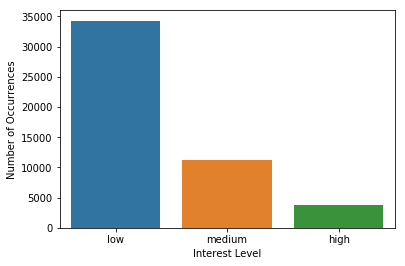

In [28]:
# 查看每个变量的分布情况
sns.countplot(train.interest_level, order=['low', 'medium', 'high'])
plt.xlabel('Interest Level')
plt.ylabel('Number of Occurrences')
plt.show()

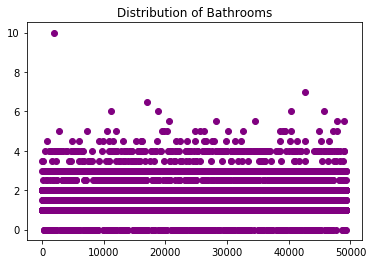

In [29]:
# 绘制散点图
plt.scatter(range(train.shape[0]), train['bathrooms'].values, color='purple')
plt.title('Distribution of Bathrooms')
plt.show()

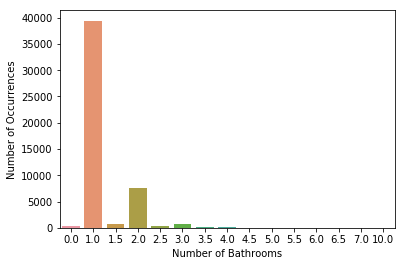

In [35]:
# 绘制直方图
fig = plt.figure()
sns.countplot(train.bathrooms)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Occurrences')
plt.show()

d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


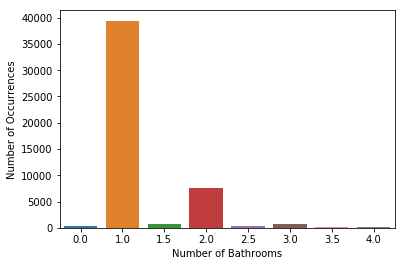

In [36]:
# 绘制直方图
fig = plt.figure()
# 去除 4 个以上的浴室数据：去除噪声 
ulimit = 4
train['bathrooms'].loc[train['bathrooms'] > ulimit] = ulimit

sns.countplot(train.bathrooms)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Occurrences')
plt.show()

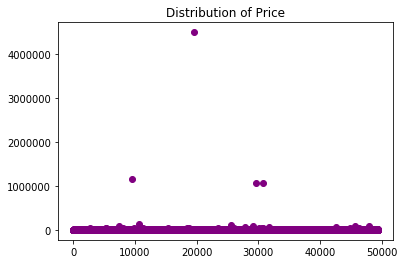

In [38]:
# price 特征，散点图
plt.scatter(range(train.shape[0]), train['price'].values, color='purple')
plt.title('Distribution of Price')
plt.show()
# 也有噪声 

d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


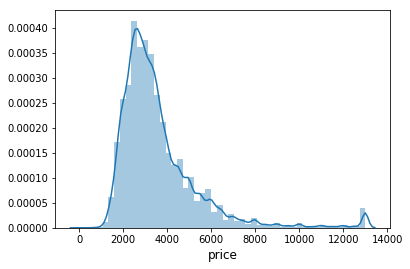

In [39]:
# price 去除噪声
ulimit = np.percentile(train.price.values, 99)
# ulimit = 1000000
train['price'].loc[train['price'] > ulimit] = ulimit
# 既可以画直方图，也可以把核密度曲线画出来 
sns.distplot(train.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show() 

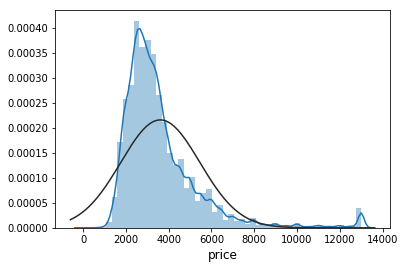

In [40]:
# 核密度估计 kde , fit 拟合
sns.distplot(train.price.values, kde=True, fit=stats.norm)
plt.xlabel('price', fontsize=12)
plt.show()

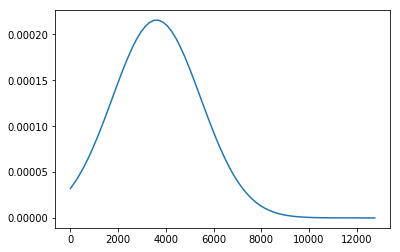

In [41]:
# 极大似然估计 正态分布参数
price_mean = train.price.mean()
price_std = train.price.std()

# 显示估计的正态分布 pdf
# x = train.price
x = np.arange(0, 5 * price_std + price_mean, 0.1 * price_std)
y = stats.norm.pdf(x, price_mean, price_std)
plt.plot(x, y)
plt.show()

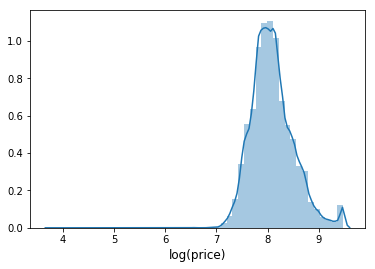

In [42]:
plt.figure()
# 对价格 price 先取 log 再画出直方图。这是经验，直接用不行，就先取 log 就好了 
sns.distplot(np.log1p(train['price']))
plt.xlabel('log(price)', fontsize=12)
plt.show()

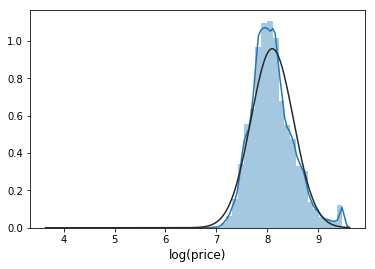

In [43]:
# 对价格取 log 之后，进行核密度估计 kde , fit 拟合
sns.distplot(np.log1p(train['price']), kde=True, fit=stats.norm)
plt.xlabel('log(price)', fontsize=12)
plt.show()